# Statistical Tests

A common question we would like to answer when conducting data analysis is, how likely is the true value $b$ when the observed value is $a$? Statistical tests help us answer such a question.

We will introduce two In this notebook: *Z*-test and *t*-test. They both provide an answer to the question of **how likely are we going to see our observed sample average $\bar{X}$ when the population average is $\mu_0$**. 

For both tests, the procedure is as follows:
1. We have a value $\mu_0$ that we think might be the population average. 
    This is called the **null hypothesis**.
2. We construct the **test statistic**, which is a value calculated 
    from $\mu_0$ as well as the observed sample average $\bar{X}$. 
3. We compute the chance of seeing a test statistic at least as extreme as the one we have.
    This chance is called the **p-value**.
4. If the answer is unlikely, then we would *reject* the hypothesis that $\mu_0$ is the population average.


First let us import some standard libraries:


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

### A. *Z*-Test

A *Z*-test assumes the test statistic has a standard normal distribution. To construct the *Z*-test from scratch:
1. First generate some random data.
2. Calculate the sample average $\bar{X}$ and sample standard deviation $\hat{\sigma}$. This is where you would actually start in practice.
3. Calculate the test statistic:
    $$
    \frac{\bar{X} - \mu_0}{\hat{\sigma}/\sqrt{n}}
    $$
4. Compute the *p-value*.

In [30]:
# Standard normal distribution
from scipy.stats import norm

# Generate some random numbers based on average pop_avg and std. dev. pop_sd
pop_avg = 1
pop_sd = 1
x = np.random.randn(30) * pop_sd + pop_avg

# Sample average, sample standard deviation and sample size
sample_mean = np.mean(x)
sample_sd = np.std(x, ddof=1)
n = len(x)

# Test statistic
mu_0 = 0
z = (sample_mean - mu_0)/sample_sd * math.sqrt(n)

# p-value
p = (1 - norm.cdf(abs(z))) * 2

# Show results
print("population average:",pop_avg)
print("-"*40)
print("sample average:    ",sample_mean)
print("null hypothesis:   ",mu_0)
print("test statistic:    ",z)
print("p-value:           ",p)

population average: 1
----------------------------------------
sample average:     0.831428990314
null hypothesis:    0
test statistic:     4.61395954155
p-value:            3.95069361203e-06


**The norm in social sciences is to reject the null hypothesis if the p-value is smaller than 0.05.** 
This means that if the hypothesized value is indeed the true value, there is only less than 5 percent chance that we are going to see the observed value. This is deemed unlikely enough that most social scientists will conclude the hypothesized value is not the true value.

**It is important to note that the rejection of the null hypothesis does not prove that the observed value equals the true value**. The observed value is your best guess, but it would be impossible to reject other values that are only slightly different from the observed value. 

### B. *t*-Test

Student's *t*-test adjusts the distribution of the test statistic according to sample size, under the assumption that the population is normally distributed. Let us first investigate what adjustment is necessary.  

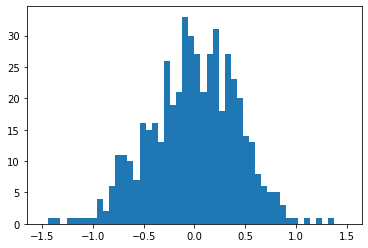

In [4]:
# Repeat 500 times, 5 data points each
S = []
for i in range(500):
    S.append(np.mean(np.random.randn(5)))
plt.hist(S,bins=50,range=(-1.5,1.5))
plt.show()

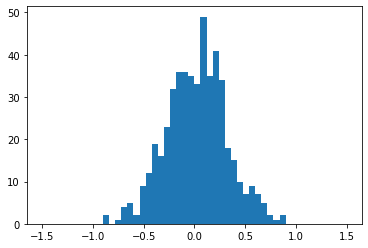

In [5]:
# Repeat 500 times, 10 data points each
S = []
for i in range(500):
    S.append(np.mean(np.random.randn(10)))
plt.hist(S,bins=50,range=(-1.5,1.5))
plt.show()

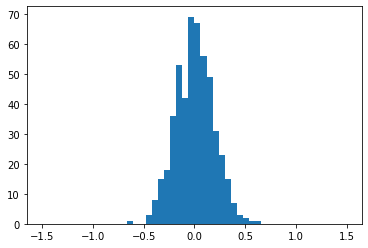

In [6]:
# Repeat 500 times, 30 data points each
S = []
for i in range(500):
    S.append(np.mean(np.random.randn(30)))
plt.hist(S,bins=50,range=(-1.5,1.5))
plt.show()

It should now be clear that the smaller the sample size, the "fatter" the distribution of the test statistic is. This means that when sample size is small, we will see extreme test statistic more often. 

To account for this phenomenon, *t*-test adjusts the distribution it use to determine whether a test statistic is too extreme. This *t*-distribution requires us to provide the **degrees of freedom**, which equals to sample size - 1.

Let us check out the difference between the standard normal distribution and the *t*-distribution:


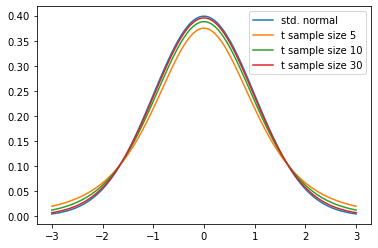

In [55]:
# t distribution
from scipy.stats import t

x = np.linspace(-3,3,100)
plt.plot(x, stats.norm.pdf(x), 
         x, stats.t.pdf(x,df=4),
         x, stats.t.pdf(x,df=9),
         x, stats.t.pdf(x,df=29)
        )
plt.legend(['std. normal','t sample size 5','t sample size 10','t sample size 30'])
plt.show()


In elementary statistics, this adjustment is usually done for sample size smaller than 30. Beyond that the distribution is often deemed close enough to simply use the *Z*-test.

We can run a t-test from scratch simply by using the *t*-distribution instead of the standard normal distribution:

In [34]:
# t-test p-value
(1 - t.cdf(abs(z),n-1)) * 2

0.013235599563682809

### C. Scipy
```scipy.stats``` contains many of the common statistical tests, including *t*-test: ```scipy.stats.ttest_1samp(x,popmean)```.


In [35]:
# t-test
from scipy.stats import ttest_1samp
ttest_1samp(x,0)

Ttest_1sampResult(statistic=4.2426406871192848, pvalue=0.013235599563682695)